Question 2: Select any one TS variable and perform the following

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the dataframe using pandas
df=pd.read_csv('D:\SEM 3\Python for Data Science\MetroPT3(AirCompressor).csv')

In [3]:
# Replacing the index as timestamo
df.index=df['timestamp']

In [4]:
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 03:59:10,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:20,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:30,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
del df['timestamp']

In [6]:
# Creating another dataframe with 100000 rows and all columns of df
df1=df.iloc[:100000,:]

(a) Plot ACF and PACF charts for TS variable.

In [7]:
# Importing the libraries
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


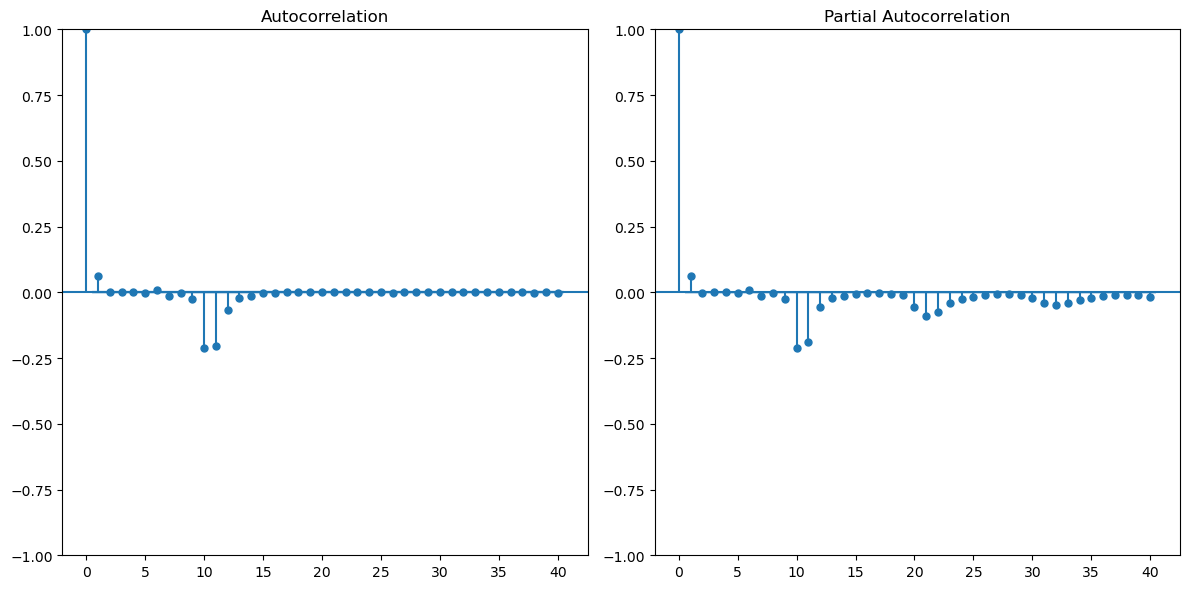

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_acf(df1['TP2'].diff().dropna(),lags=40,ax=plt.gca())
plt.subplot(1,2,2)
plot_pacf(df1['TP2'].diff().dropna(),lags=40,ax=plt.gca())

plt.tight_layout()
plt.show()

(b) Perform ADF test to check the given TS variable for stationarity.

In [9]:
# Importing libraries
from statsmodels.tsa.stattools import adfuller

In [10]:
# Variable: DV_pressure
def stationarity_test(ts):
  # Perform the Dickey_Fuller test
  result=adfuller(ts,autolag='AIC')
  # Extract and print test results
  print('Results of Dickey-Fuller Test:')
  df_output=pd.Series(result[0:4],index=['ADF','p-value','Number of Lags','Number of Observations for ADF Regression and Critical Values Calculation'])

  for key,value in result[4].items():
    df_output[f'Critical Value ({key})']=value
  print(df_output)

stationarity_test(df1['DV_pressure'])

Results of Dickey-Fuller Test:
ADF                                                                           -315.986686
p-value                                                                          0.000000
Number of Lags                                                                   0.000000
Number of Observations for ADF Regression and Critical Values Calculation    99999.000000
Critical Value (1%)                                                             -3.430415
Critical Value (5%)                                                             -2.861569
Critical Value (10%)                                                            -2.566785
dtype: float64


(c)Write a python function/method that returns the ARIMA order for the given TS variable.

In [11]:
# Importing libraries
from statsmodels.tsa.arima_model import ARIMA

In [12]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df1['DV_pressure'],trace=True,
                        suppress_warnings=True)

Performing stepwise search to minimize aic


In [ ]:
stepwise_fit.order

(d) Forecast the TS variables for the following horizons (h=5, 10,15, and 50) and compute Mean
Absolute Error (MAE).

In [17]:
df1.shape

(100000, 16)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [22]:
train,test=train_test_split(df1,test_size=0.3,random_state=42)

In [23]:
train

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,,
2020-02-11 09:09:33,765130,-0.014,8.766,8.750,-0.022,8.766,54.250,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-09 05:49:58,604060,-0.012,9.668,9.652,-0.020,9.670,55.375,3.7500,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-04 12:12:02,273220,-0.012,9.052,9.038,-0.018,9.056,57.300,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-08 07:24:35,536990,-0.012,9.350,9.336,-0.018,9.352,57.575,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-09 19:37:02,654120,-0.008,9.170,9.154,-0.016,9.172,58.975,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01 17:19:59,62650,-0.010,9.744,9.730,-0.016,9.746,59.300,3.8600,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-08 10:40:42,548860,-0.012,8.474,8.460,-0.016,8.478,57.575,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-11 10:00:16,768200,-0.010,9.536,9.522,-0.020,9.540,57.325,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [24]:
test

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,,
2020-02-11 06:58:42,757210,-0.012,9.588,9.572,-0.022,9.590,55.000,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-11 19:16:01,801840,-0.014,8.780,8.764,-0.020,8.780,56.400,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-03 15:39:55,198640,-0.012,8.692,8.676,-0.018,8.692,56.500,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-11 09:40:17,766990,-0.014,9.004,8.990,-0.018,9.008,54.800,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-13 10:17:08,929910,-0.012,9.314,9.300,-0.016,9.320,59.600,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-06 15:50:53,426480,-0.012,9.838,9.824,-0.018,9.842,64.275,3.6875,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-12 15:52:42,863060,-0.010,8.818,8.804,-0.014,8.822,60.200,0.0325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-07 08:33:04,454660,-0.014,8.420,8.406,-0.016,8.426,57.925,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [25]:
model=ARIMA(train['DV_pressure'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            DV_pressure   No. Observations:                70000
Model:                 ARIMA(1, 0, 5)   Log Likelihood               59514.880
Date:                Sun, 27 Aug 2023   AIC                        -119013.760
Time:                        15:05:20   BIC                        -118940.510
Sample:                             0   HQIC                       -118991.168
                              - 70000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0152      0.001    -11.112      0.000      -0.018      -0.012
ar.L1          0.9952      0.005    181.831      0.000       0.984       1.006
ma.L1         -0.9965      0.077    -12.930      0.000      -1.148      -0.845
ma.L2         -0.0001      0.106     -0.001      0.999      -0.208       0.208
ma.L3       8.719e-05      0.105      0.001      0.999      -0.206       0.206
ma.L4      -2.808e-05      0.104     -0.000      1.000      -0.205       0.204
ma.L5          0.0005      0.070      0.008      0.994      -0.137       0.138
sigma2         0.0107   7.39e-06   1445.773      0.000       0.011       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):       11728395992.92
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                            43.36
Prob(H) (two-sided):                  0.00   Kurtosis:                      2006.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
horizons=[5, 10, 15, 50]
forecasted={}

for horizon in horizons:
    forecast = model.forecast(steps=horizon)
    forecasted[horizon]=forecast

# Print forecasts for different horizons
for horizon, forecast in forecasted.items():
    print(f"Forecast for horizon {horizon}:", forecast)


Forecast for horizon 5: 70000   -0.015083
70001   -0.015084
70002   -0.015087
70003   -0.015092
70004   -0.015095
Name: predicted_mean, dtype: float64
Forecast for horizon 10: 70000   -0.015083
70001   -0.015084
70002   -0.015087
70003   -0.015092
70004   -0.015095
70005   -0.015095
70006   -0.015096
70007   -0.015096
70008   -0.015096
70009   -0.015097
Name: predicted_mean, dtype: float64
Forecast for horizon 15: 70000   -0.015083
70001   -0.015084
70002   -0.015087
70003   -0.015092
70004   -0.015095
70005   -0.015095
70006   -0.015096
70007   -0.015096
70008   -0.015096
70009   -0.015097
70010   -0.015097
70011   -0.015098
70012   -0.015098
70013   -0.015098
70014   -0.015099
Name: predicted_mean, dtype: float64
Forecast for horizon 50: 70000   -0.015083
70001   -0.015084
70002   -0.015087
70003   -0.015092
70004   -0.015095
70005   -0.015095
70006   -0.015096
70007   -0.015096
70008   -0.015096
70009   -0.015097
70010   -0.015097
70011   -0.015098
70012   -0.015098
70013   -0.01509

In [32]:
# Calculate and print Mean Absolute Errors (MAEs) for different horizons
for horizon, forecast in forecasted.items():
    actual_values=test['DV_pressure'][:horizon]
    mae = mean_absolute_error(actual_values, forecast)
    print(f"MAE for horizon {horizon}: {mae}")

MAE for horizon 5: 0.0037119298113475517
MAE for horizon 10: 0.0033079481360914634
MAE for horizon 15: 0.0031856735061314948
MAE for horizon 50: 0.003527510872733167


(e) Plot actual and forecasted values of the TS variable.

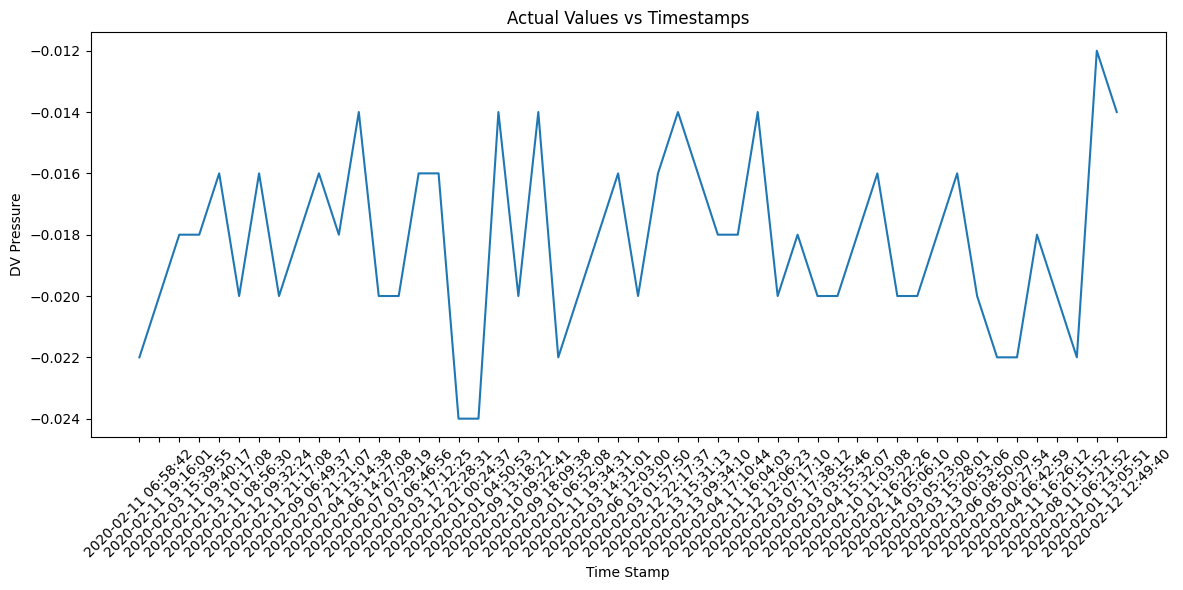

In [43]:
# Plot Actual Values
plt.figure(figsize=(12,6))
plt.plot(actual_values.index, actual_values)
plt.xticks(rotation=45)

plt.xlabel("Time Stamp")
plt.ylabel("DV Pressure")
plt.title("Actual Values vs Timestamps")
plt.tight_layout()
plt.show()

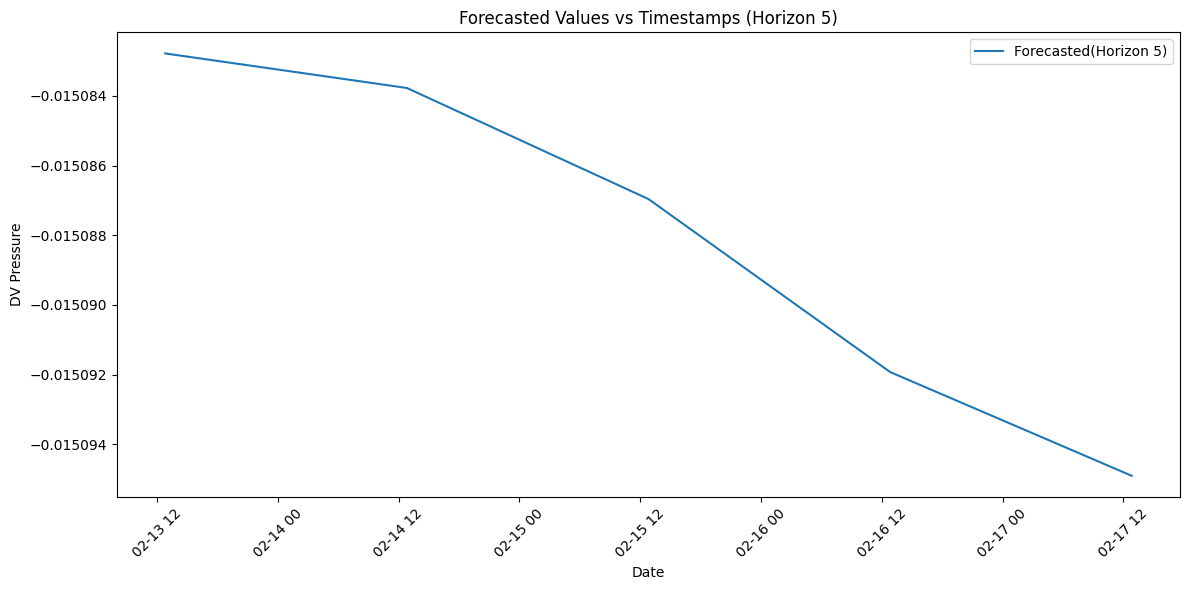

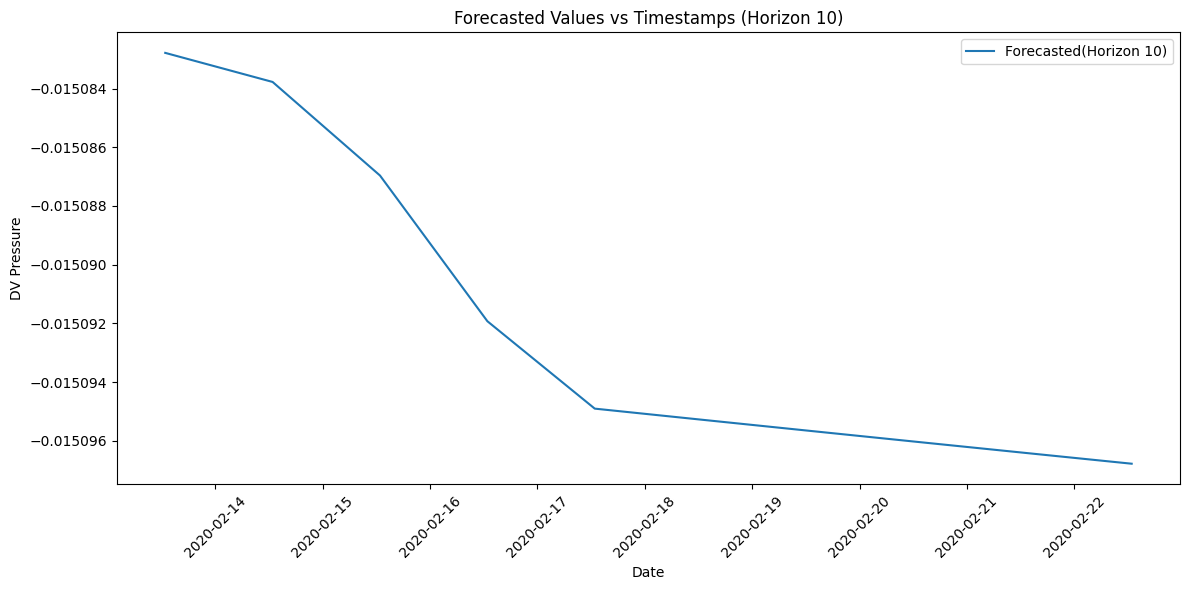

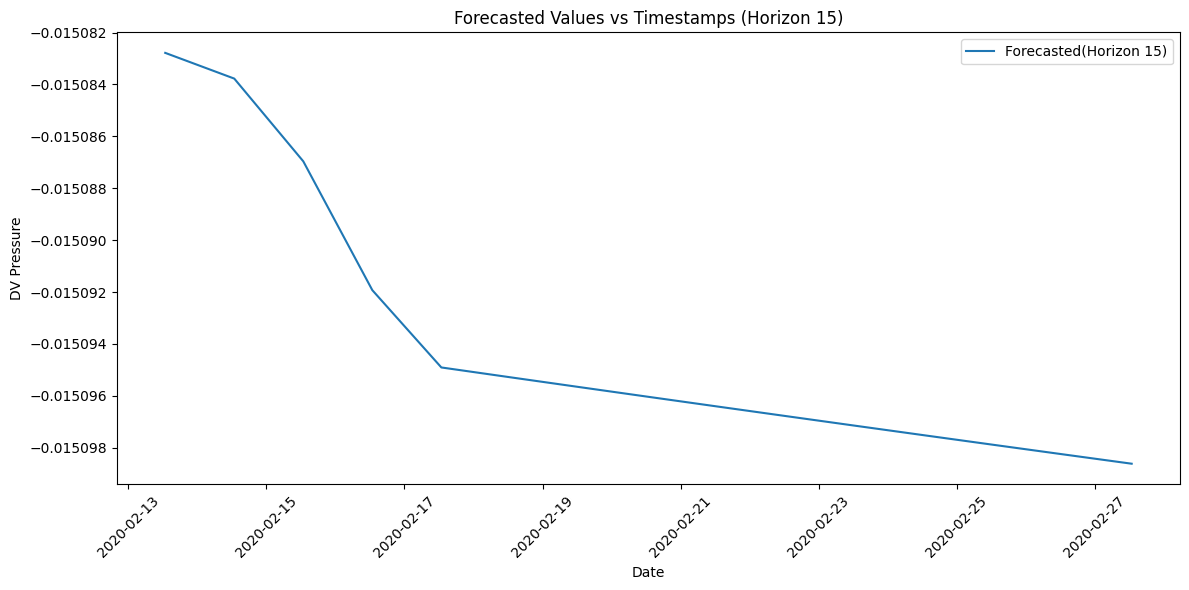

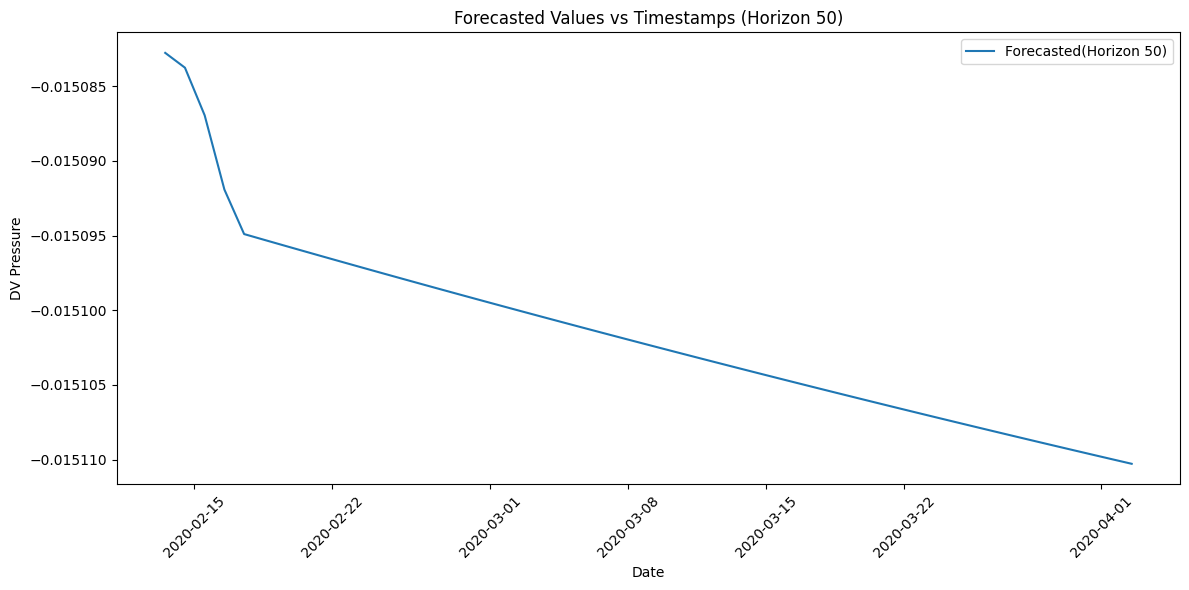

In [53]:
# Plot Forecasted Values for each horizon
for horizon, forecast in forecasted.items():
    forecast_dates = pd.date_range(start=actual_values.index[-1], periods=horizon+1, freq='D')[1:]

    plt.figure(figsize=(12, 6))

    plt.plot(forecast_dates, forecast, label=f"Forecasted(Horizon {horizon})")

    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("DV Pressure")
    plt.title(f"Forecasted Values vs Timestamps (Horizon {horizon})")
    plt.legend()
    plt.tight_layout()
    plt.show()
